# LangChain

---------------------------------------------------------------------------------------------------------

## 1. Langchain_Basics

### 1.1 Why Langchain is used ?

* Initially there were only few models, later many models came into the race, each model came up with different set of libraries to access the models.
  
* For example, OpenAI had its own API, Hugging Face used transformers, and models like GPT-3 or LLaMA required specific libraries like openai or torch. This made it challenging to integrate and switch between different models.

* So Langchain created a common framework to develop Gen AI App.

* With LangChain, developers can easily access models like OpenAI, Hugging Face, LLaMA, Google Gemini, and others through a single, simplified API with minimal code changes. But without Langchain you will need seperate libraries and code for different model (eg. OpenAI,Hugging Face).


### 1.2 Langchain Ecosystem

* The LangChain Ecosystem refers to the collection of tools, libraries, modules, and integrations within LangChain that make it easier to build applications using large language models (LLMs)

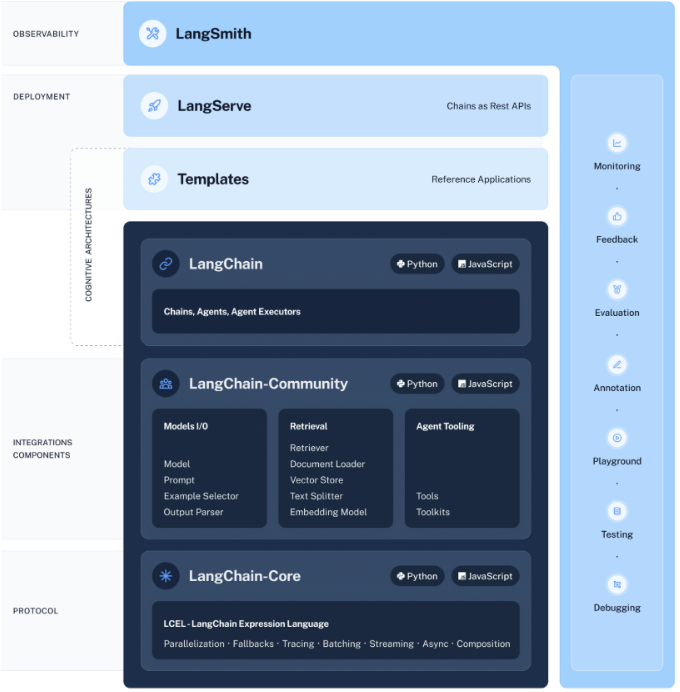

* LangSmith: Used to do LLMOPS like Testing, Debugging, Monitoring, Evaluation, Feedback, Annotation etc.
* LangServe: A lightweight server that lets you deploy and serve LLMs via APIs for real-time inference.

--------------------------------------------------------------------------------------------------------------------------------------------------------

### 2. Data Ingestion

* Ingest the data using Document Loader.
* You can either ingest the data as txt,pdf,csv, read from website etc..

In [5]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("Data/Sample.pdf")
document = loader.load()
document

[Document(metadata={'source': 'Data/Sample.pdf', 'page': 0, 'page_label': '1'}, page_content='1. In the beginning God created the heavens and the earth. \n 2. Now the earth was formless and empty, darkness was over the surface of the deep, and \nthe Spirit of God was hovering over the waters \n3. And God said, “Let there be light, ” and there was light. ')]

--------------------------------------------------------------------------------------------------------------------------------------------------------

### 3. Text Splitting and Chunking

* Convert the entire paragraph into Chunks.

#### 3.1. Recursive Character Text Splitter (Recommended)

* Context-Aware Splitting: It splits the text recursively, ensuring that chunks are split intelligently while preserving context (e.g., not splitting in the middle of sentences or paragraphs).

* Example: If chunk_size=100, it will try to split the text into chunks of around 100 characters, but will look for logical points (like spaces or punctuation) to avoid cutting off words or sentences.

In [6]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

splitter = RecursiveCharacterTextSplitter(chunk_size=50, chunk_overlap=20)

# If input is document
chunks = splitter.split_text(document[0].page_content)

#If input is not document, convert into document
#chunks = splitter.create_document([document])

# Display the chunks
for i, chunk in enumerate(chunks):
    print(f"chunk {i+1}: {chunk}\n{'-'*50}")

chunk 1: 1. In the beginning God created the heavens and
--------------------------------------------------
chunk 2: the heavens and the earth.
--------------------------------------------------
chunk 3: 2. Now the earth was formless and empty,
--------------------------------------------------
chunk 4: formless and empty, darkness was over the surface
--------------------------------------------------
chunk 5: over the surface of the deep, and
--------------------------------------------------
chunk 6: the Spirit of God was hovering over the waters
--------------------------------------------------
chunk 7: 3. And God said, “Let there be light, ” and there
--------------------------------------------------
chunk 8: light, ” and there was light.
--------------------------------------------------


### 3.2 CharcterTextSplitter 

* Basic Splitting: It splits the text into fixed-size chunks based purely on the character count, without considering context or structure.

* Example: If chunk_size=100, it will simply split the text into chunks of 100 characters, regardless of sentence or word boundaries.

In [7]:
from langchain.text_splitter import CharacterTextSplitter

# default seperator="\n\n". Since it cannogt find /n/n its not done correctly
splitter = CharacterTextSplitter(chunk_size=50, chunk_overlap=20)

chunks = splitter.split_text(document[0].page_content)

# Display the chunks
for i, chunk in enumerate(chunks):
    print(f"chunk {i+1}: {chunk}\n{'-'*50}")

chunk 1: 1. In the beginning God created the heavens and the earth. 
 2. Now the earth was formless and empty, darkness was over the surface of the deep, and 
the Spirit of God was hovering over the waters 
3. And God said, “Let there be light, ” and there was light.
--------------------------------------------------


note : You can also read on HTMLTextSplitter, RecursiveJsonSplitter etc

--------------------------------------------------------------------------------------------------------------------------------------------------------

### 4. Embedding

* Converting text into vectors.
* Embedding can be done is many ways including using OpenAI , OLLama, Huggingface embedding models.

Note in ChatGPT, They have used Byte Pair Encoding. 
* For external use its provides 2 embedding - 1. text-embedding-3-small (1,536 dims), 2. text-embedding-3-large (3,072 dims)

#### Example. OpenAI Embedding

In [ ]:
from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

# Embed the query text
text = "This is an OPENAI embeddings"
query_result = embeddings.embed_query(text)

# Display the result
print(query_result) # This will print 3072 dimension vector (Which is the default for this model)

# If you want to change the dimension
embeddings_1024 = OpenAIEmbeddings(model="text-embedding-3-large",dimensions=1024) # add dimension.
query_result_1024 = embeddings.embed_query(text)
len(query_result_1024) # this will display vector with 1024 dimension.

--------------------------------------------------------------------------------------------------------------------------------------------------------

### 5. VectorStoreDB

* A vector store database stores high-dimensional vector embeddings for tasks like similarity search and clustering.

* It uses indexing techniques for fast retrieval of similar vectors based on proximity in the vector space.

* Few popular VectorDB are FAISS (Facebook/Meta AI), CHROMADB (Chroma-startup company), ASTRADB etc..

* It has "Similarity Seach with Score" functionality which allows you to return not only the relevant documents but also the distance score of the query to them. The distance is calculated by Cosine similarity, Euclidean, manhattan..

##### Cosine Similarity
* Most common for text embeddings.
* Measures the angles between two vectors.
* Value ranges from -1 to 1

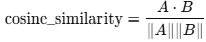

#### 5.1 FAISS (Facebook AI Similarity Search):

* It is a library for efficient similarity search and clustering of dense vectors.

* It contains algorithms that search in sets of vectors of any size, up to ones that possibly do not fit in RAM.

* It also contains supporting code for evaluation and parameter tuning.

In [ ]:
# Importing necessary Libraries
from langchain_community.document_loaders import TextLoader # To load a txt file
from langchain.text_splitter import RecursiveCharacterTextSplitter # To create chunks
from langchain_community.embeddings import OllamaEmbeddings # embedding from Ollama
from langchain_community.vectorstores import FAISS # store in FAISS Database

# Data Ingestion
loader = TextLoader("Data/sample_text.txt", encoding="utf-8")
documents = loader.load()

# Text Splitting using RecursiveCharacterTextSplitter
text_splitter= RecursiveCharacterTextSplitter(chunk_size=50,chunk_overlap=20)
docs = text_splitter.split_documents(documents)

# Create Embedding using OllamaEmbeddings , by default its using llama 2 at this time
embeddings = OllamaEmbeddings()

# store the vector in FAISS Vectorstore
db = FAISS.from_documents(docs,embeddings)

# Querying
query = "who created earth?"

# Do the similarity search to search and retrieve relevant chunk from FAISS DB
docs = db.similarity_search(query)

# Convert the vectordb as a Retriever class since it has more advanced functionality than simple similarity search (acts as interface if we query it will retrieve details from db and provide you response)
retriever = db.as_retriever()
docs1= retriever.invoke(query)

# Note, in this case similary search and retriever will give the same answer

# Find the Similarity Score which is one of the functionality of FAISS
docs_and_score = db.similarity_search_with_score(query)
print(docs_and_score) # output  page_content='the Spirit of God was hovering over the waters'), 15665.869),  'In the beginning God created the heavens and'), 16669.348)

# save the VectorDB in local
db.save_local("faiss_index") # it will create a pkl file

# Load the VectorDB that is stored in the local
new_db = FAISS.load_local("faiss_index",embeddings,allow_dangerous_deserialization=True)
docs = new_db.similarity_search_with_score(query)
docs

##### Without giving a sentence to query, we can also convert the query to vectors and do similarity search.

In [ ]:
query = "who created earth?"

# Convert the query into vector using ollama embedding
embedding_vector = embeddings.embed_query(query)

# Find the Similarity Score
docs_and_score_2 = db.similarity_search_with_score(query)
print(docs_and_score_2) # same output

### 5.2 ChromaDB

* ChromaDB is an open-source vector database designed for storing and retrieving embeddings efficiently, often used in AI applications like semantic search and recommendation systems. 

* It helps in managing high-dimensional data for tasks like similarity search and retrieval-augmented generation (RAG).

* Chroma is licensed under Apache 2.O

In [ ]:
# store the vector in Chroma Vectorstore
db = Chroma.from_documents(docs,embeddings)

# save the Chroma VectorDB in local
chroma_vectordb = Chroma.from_documents(docs,embeddings,persist_directory="./chroma_db")

# Load the Chroma VectorDB that is stored in the local
db2 = Chroma(persist_directory="./chroma_db",embedding_function=embeddings)

# Similarity search from the vectordb
docs = db2.similarity_search_with_score(query)
docs 

# Convert the vectordb as a Retriever class since it has more advanced functionality than simple similarity search (acts as interface if we query it will retrieve details from db and provide you response)
retriever = db.as_retriever()
docs2= retriever.invoke(query)
docs2

Note : FAISS is a fast, in-memory vector search library for quickly finding similar embeddings, while ChromaDB is a full vector database that stores embeddings, allows updates, and makes it easy to build apps like chatbots or RAG systems.

--------------------------------------------------------------------------------------------------------------------------------------------------------

### 6. Chain

#### 6.1 What is chain?

* Chain is basically a sequence of steps that LLM follows to solve a task.

#### 6.2 Why do we need chain ?

* Modularity: You can mix and match steps (LLM, retrievers, tools).

* Reusability: You can reuse the same chain for different tasks.

* Complex workflows: Can handle multiple LLM calls, tools, or APIs in order.

### 6.3 Types of Chain ?
* LLM Chain
* Sequential Chain
* Router Chain

### 1. LLM Chain - Single Step:
* When you want only one LLM operation like summarization, translation etc.

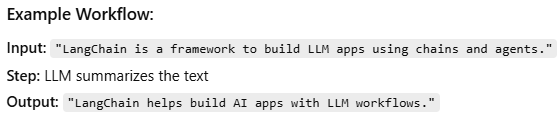

In [ ]:
# model 
llm = ChatOpenAI()

# prompt
prompt = PromptTemplate(input_variables = ['text'], template = "Summarize this in one sentence {text}")

# chain
from langchain.chains import LLMChain
chain = LLMchain(llm=llm, prompt=prompt)

# input
text = "LangChain is a framework to build LLM apps using chains and agents."
summary = chain.run(text)

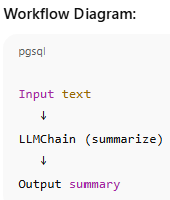

### 2. Sequential Chain - Multiple Steps 

* When you need multiple steps in order, e.g., translate then summarize, or preprocess then generate answer.

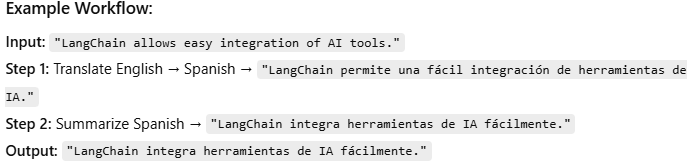

In [ ]:
from langchain.chains import LLMChain
from langchain.chains import SequentialChain

# model 
llm = ChatOpenAI()

# Step 1 : Translate
prompt_translate = PromptTemplate(input_variables = ['text'], template = "Translate this sentence {text}")
chain_translate = LLMchain(llm=llm, prompt=prompt_translate,output_key="spanish_text")

# Step 2 : Summarize
prompt_summarize = PromptTemplate(input_variables = ['spanish_text'], template = "Summarize this in one sentence {spanish_text}")
chain_summarize = LLMchain(llm=llm, prompt=prompt_summarize,output_key='summary')

# Sequential Chain
seq_chain = SequentialChain(chains=[chain_translate,chain_summarize],input_variables=['text'],output_variables=['summary']) #chains,input_variables,output_variables

# input
text = "LangChain is a framework to build LLM apps using chains and agents."
result = seq_chain.run({'text':text})
print(result['summary'])

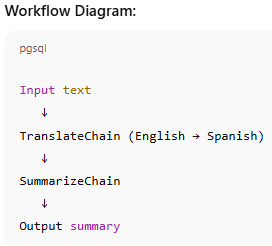

### 3. Router Chain

* When you need to choose different workflows based on input type, e.g., math vs text, question vs summarization.

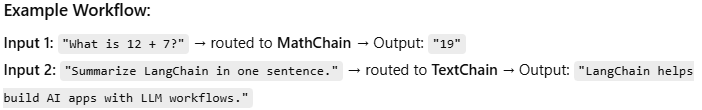

In [ ]:
# model 
llm = ChatOpenAI()

# Math chain
math_prompt = PromptTemplate( input_variables=["question"], template="Solve this math problem: {question}")
math_chain = LLMChain(llm=llm, prompt=math_prompt)

# Text chain
text_prompt = PromptTemplate( input_variables=["question"], template="Summarize this text: {question}")
text_chain = LLMChain(llm=llm, prompt=text_prompt)

# Router Function
def route_input(question):
    if any(char.isdigit() for char in question):
        return math_chain.run(question)
    else:
        return text_chain.run(question)
        
# input
question = "What is 12 + 7?"
result = route_input(question)

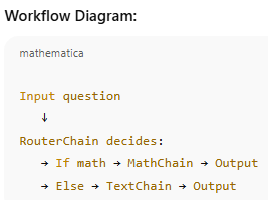

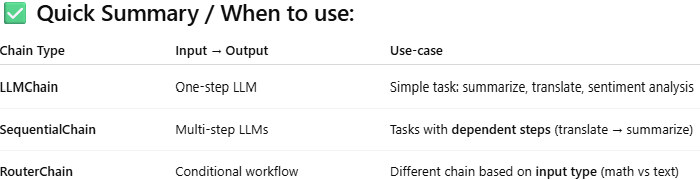

--------------------------------------------------------------------------------------------------------------------------------------------------------

## 7. Retrievers

* Retriever is a wrapper around VectorStoreDB.
* We cannot integrate VectorStoreDB directly with chains (to do RetrievealQA,RAG), so we convert vectorestore as Retrievers.

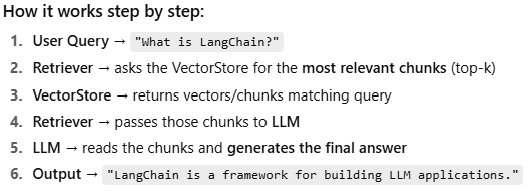

### 7.1 VectorStoreDB VS Retrievers?

##### 1. VectorStoreDB:
* It fetches the top-k relevant information only.

##### 2. Retrievers:
It has some extra features like Top-k selection + Metadata filtering (return document named "python") and format them properly for LLM input + it allows Sync/async methods + easy integrations with chains

In [ ]:
# store the vector in Chroma Vectorstore
vectorstore = Chroma.from_documents(docs,embeddings)

# Retriever
retriever = vectorstore.as_retriever(search_kwargs={"k":1})

qa = RetrievalQA.from_chain_type(llm=llm, retriever=retriever)

print(qa.run("What is LangChain?"))

--------------------------------------------------------------------------------------------------------------------------------------------------------

### 8. Output Parser

* An output parser is a tool that helps process and format the AI's response into a structured format, like JSON or key-value pairs or just the content.

Simple Explanation : You can decide what all should be in ouput eg: only content etc..

Here you need not write response.content

In [ ]:
from langchain_core.output_parsers import StrOutputParser

# Initialize the output parser
Output_parser = StrOutputParser()

# The input will go through the prompt, then LLM and then Output_parser
chain=prompt|llm|Output_parser

# provide the input and invoke the chain
response = chain.invoke({"input":"Can you tell me about Langsmith?"})
print(response) # you need not write  ".content" # it only prints content not any other metadata.

--------------------------------------------------------------------------------------------------------------------------------------------------------

## 9. Prompt Template

* A Prompt Template is a predefined prompt with placeholders that you can fill dynamically.
* Makes your prompts reusable for different inputs and avoids repetetion.
* Prompt Template is like an instruction telling chatbot how to behave.

### 9.1 Types of Prompt Template
1. PromptTemplate:
* Single-variable Prompt → 1 placeholder
* Multi-variable Prompt → multiple placeholders
* Few-Shot / Example-based Prompt → includes examples

2. ChatPromptTemplate  → Chat models/ multiple messages / roles

3. MessagesPlaceholder → dynamic conversation history

### 1. PromptTemplate

### 1.1 Single-variable Prompt:
* Description : Prompt with 1 placeholder

In [14]:
from langchain.prompts import PromptTemplate

template = PromptTemplate( input_variables=["text"],template="Translate this text to French: {text}")
prompt = template.format(text="Hello")
print(prompt)

Translate this text to French: Hello


### 1.2 Multi-variable Prompt

* Description : Prompt with multiple placeholders

In [15]:
from langchain.prompts import PromptTemplate

template = PromptTemplate( input_variables=["topic", "text"],template="Summarize the following text about {topic}: {text}")
prompt = template.format(topic="AI", text="LangChain is a framework...")
print(prompt)

Summarize the following text about AI: LangChain is a framework...


### 1.3 Few-Shot / Example-based Prompt → includes examples

* Description: Shows examples in the prompt to guide the LLM.

In [ ]:
template = PromptTemplate(
    input_variables=["text"],
    template="""
Text: I love apples
Sentiment: Positive

Text: I hate rain
Sentiment: Negative

Text: {text}
Sentiment:"""
)

llm_chain = LLMChain(llm=ChatOpenAI(), prompt=template)

result = llm_chain.invoke({"text": "The movie was amazing"})
print(result) # Output : Positive

### 2. ChatPromptTemplate

* Description: Used for chat models with roles and dynamic history.

#### 2.1 Single User Query

In [ ]:
# Use .from_template for a single user query
chat_prompt = ChatPromptTemplate.from_template("Tell me a joke about {topic}")
formatted_prompt = chat_prompt.invoke({"topic":"cats"})
response = llm.invoke(formatted_prompt)

#### 2.2 Multiple Message Roles (System & User)

In [18]:
# use from_messages for System + User Roles
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are an expert AI Engineer. Provide me answers based on the question"),  
        ("user", "{input}")  
    ]
)
chain = prompt|llm
response = chain.invoke({"input":"Can you tell me about Langsmith?"})

[SystemMessage(content='You are a helpful assistant.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Translate this to French: Hello', additional_kwargs={}, response_metadata={})]


### 3. ChatPromptTemplate with Messages Placeholder

* In chat applications, the LLM often needs context from previous messages.
* MessagesPlaceholder is a special placeholder that you can put in a ChatPromptTemplate to insert conversation history dynamically.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate,MessagesPlaceholder
from langchain_core.messages import HumanMessage

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assisstant. Provide me answers based on the question"),  
        MessagesPlaceholder(variable_name="messages")
    ]
)

chain = prompt|llm
chain.invoke({"messages":[HumanMessage(content = "Hi My name is jemima")]})
# Output : Hello Jemima! How can I assist you today? 

### 9.2 Prompt Template Features:

* format() → Only prepares the prompt, no LLM Call.
* invoke() → prepares the prompt and calls the LLM with single input
* batch()  → generate multiple prompts at once
* stream() / stream_invoke → streaming outputs from LLM

#### 1. format()
* Only prepares the prompt, no LLM Call.

In [21]:
from langchain.prompts import PromptTemplate

template = PromptTemplate( input_variables=["text"],template="Translate this text to French: {text}")
prompt = template.format(text="Hello")
print(prompt)

Translate this text to French: Hello


#### 2. invoke()
* It is used When you want to run one input through the LLM.
* Sends input → fills prompt → calls LLM → returns output.

In [ ]:
template = PromptTemplate.from_template("Translate this to French: {text}")
chain = template | llm

print(chain.invoke({"text": "Hello"}))
# Output: "Bonjour"

#### 3. batch()
* When you have multiple inputs at once (process in bulk).
* Runs chain/LLM on a list of inputs in one go.

In [ ]:
inputs = [
    {"text": "Hello"},
    {"text": "Good morning"}
]
print(chain.batch(inputs))
# Output: ["Bonjour", "Bonjour"]

#### 4. stream()
* When you want to see partial results as LLM generates tokens (like real-time typing).
* It can be used only with raw LLM Call not with chains.
* otherwords : Use when you need real-time output instead of waiting for full response.

In [ ]:
for token in llm.stream("Tell me a joke about cats"):
    print(token.content, end="")
# Output prints word by word / token by token

#### 5. stream_invoke()
* Similar like stream(), but can be used with chains.

In [ ]:
for event in chain.stream_invoke({"text": "Hello"}):
    print(event)
# Output streams structured chunks (like token events)

--------------------------------------------------------------------------------------------------------------------------------------------------------

## 10. Tools and Agents

### Tools:

* Tools in langchain helps us integrate the Gen AI app with multiple external resources or tools like extenal databases, API's, Web scraping and even custom tools etc....
* You can call these tools during the conversation to get real-time data or perform actions.

#### Differences between simple tool and Structured Tool.
* Tool = simple, takes string input.
* StructuredTool = advanced, lets you define input/output schema using Pydantic (more control, better for complex tools)

In [ ]:
# Tools

# Tool1 : Wikipedia
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max = 250) # top k represents the number of output, chars max represnt how much charcter used to respond.
wiki = WikipediaQueryRun(api_wrapper = api_wrapper_wiki)

# Tool2 : arxiv
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=1, doc_content_chars_max = 250)
arxiv = ArxivQueryRun(api_wrapper = api_wrapper_arxiv)
    
# Tool3 : RAG (Custom Tool)
loader = WebBaseLoader("https://docs.smith.langchain.com/")
docs = loader.load()
documents = RecursiveCharacterTextSplitter(chunk_size = 1000, chunk_overlap=200)
documents = documents.split_documents(docs)
vectordb = FAISS.from_documents(documents, HuggingFaceEmbeddings())
retriever = vectordb.as_retriever()

# convert retriever into a tool
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(retriever, "langsmith-search","Search any info about langsmith")

# Combine 3 Tools
tools = [wiki,arxiv,retriever_tool]

In [ ]:
# Example 2
from langchain.tools import tool

@tool # use a decorator function to show it as tool
def add_numbers(numbers: str) -> str:
    """Add a list of numbers separated by commas.""" # Give docstring so that the LLM understand what this function does.
    nums = [int(x) for x in numbers.split(",")]
    return str(sum(nums))

### Agents:

* Agents are decision-makers that use tools to complete a task.
* They can choose which tool to use, when to use it, and how to interact with it based on the input they receive.
* So, this helps to manage task effectively by making choices based on context

In [ ]:
# Initialize an agent
from langchain.agents import create_openai_tools_agent
agent = create_openai_tools_agent(llm,tools,prompt)

#execute an agent
from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(agent = agent, tools = tools, verbose=True)

#invoke it
agent_executor.invoke({"input":"Tell me about Langsmith"})

--------------------------------------------------------------------------------------------------------------------------------------------------------